In [1]:
import os
import sys

import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
from matplotlib.ticker import MultipleLocator
import nibabel as nib
import pickle
from importlib import reload
import h5py
from nilearn import plotting
import nibabel as nib
from sklearn.cross_decomposition import PLSRegression
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import r2_score
from colorama import Fore, Style

os.chdir('/home/rfpred')
sys.path.append('/home/rfpred')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode')

print(sys.path)
%pwd

['/home/rfpred/notebooks/clean', '/home/rfpred/envs/rfenv/lib/python311.zip', '/home/rfpred/envs/rfenv/lib/python3.11', '/home/rfpred/envs/rfenv/lib/python3.11/lib-dynload', '', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages', '/home/rfpred/notebooks/alien_nbs/lgnpy', '/home/rfpred', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode']


'/home/rfpred'

In [2]:
from nsdcode import NSDmapdata, nsd_datalocation

from nsdcode.nsd_mapdata import NSDmapdata
from nsdcode.nsd_datalocation import nsd_datalocation
from nsdcode.nsd_output import nsd_write_fs
from nsdcode.utils import makeimagestack


In [ ]:
subjix = 1

# base_path = os.path.join('/path', 'to', 'NSD')
base_path = os.path.join('/home', 'rfpred', 'data','natural-scenes-dataset')
print(base_path)

# initiate NSDmapdata
nsd = NSDmapdata(base_path)

nsd_dir = nsd_datalocation(base_path=base_path)
nsd_betas = nsd_datalocation(base_path=base_path, dir0='betas')
# sourcedata = f'{nsd_dir}/ppdata/subj{subjix:02d}/anat/T1_0pt8_masked.nii.gz'
sourcedata = f'{base_path}/nsddata/ppdata/subj01/anat/roi/V1_mask.nii.gz'
# sourcedata = f'{base_path}/nsddata/ppdata/subj01/func1mm/roi/V1_mask.nii.gz'  # This one works, so the problem likely is not due to the nsdcode, but due to the fslmaths script.
sourcespace = 'anat0pt8'
targetspace = 'func1pt0'
interpmethod = 'cubic'
targetdata = nsd.fit(
    subjix,
    sourcespace,
    targetspace,
    sourcedata,
    interptype=interpmethod,
    badval=0,
    outputfile=f'V1-{sourcespace}-{targetspace}-{interpmethod}vogel.nii.gz')

nsd.fit(subjix=subjix, sourcedata=sourcedata, sourcespace=sourcespace, targetspace=targetspace, interptype=interpmethod)
# show the resulting transform
plt.imshow(makeimagestack(targetdata))
plt.show()

sourcedata = f'{base_path}/nsddata/ppdata/subj01/func1mm/roi/v1_mask_og.nii.gz'  # This one works, so the problem likely is not due to the nsdcode, but due to the fslmaths script.
sourcespace = 'anat0pt8'
targetspace = 'func1pt0'
interpmethod = 'cubic'
targetdata_old = nsd.fit(
    subjix,
    sourcespace,
    targetspace,
    sourcedata,
    interptype=interpmethod,
    badval=0,
    outputfile=f'V1-{sourcespace}-{targetspace}-{interpmethod}vogel.nii.gz')


6.938370712202747

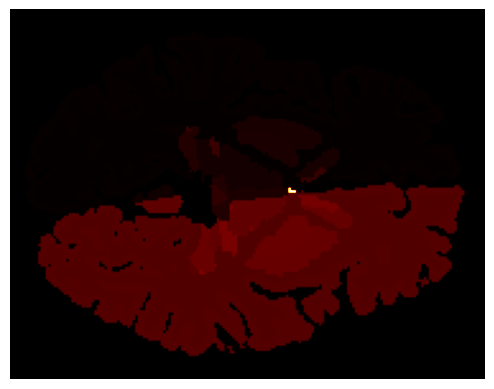

In [13]:
seg = nib.load('/home/rfpred/data/natural-scenes-dataset/nsddata/ppdata/subj01/func1mm/aseg.nii.gz').get_fdata()
plt.imshow(seg[:,:,70], cmap='afmhot')
plt.axis('off')

np.mean(seg)

In [15]:
subjix = 1

# base_path = os.path.join('/path', 'to', 'NSD')
base_path = os.path.join('/home', 'rfpred', 'data','natural-scenes-dataset')
print(base_path)

# initiate NSDmapdata
nsd = NSDmapdata(base_path)

nsd_dir = nsd_datalocation(base_path=base_path)
nsd_betas = nsd_datalocation(base_path=base_path, dir0='betas')
# sourcedata = f'{nsd_dir}/ppdata/subj{subjix:02d}/anat/T1_0pt8_masked.nii.gz'
# sourcedata = f'{base_path}/nsddata/ppdata/subj01/anat/roi/V1_mask.nii.gz'
sourcedata = '/home/rfpred/data/custom_files/subj01/freesurfer/fs_test_enc.nii'
# sourcedata = f'{base_path}/nsddata/ppdata/subj01/func1mm/roi/V1_mask.nii.gz'  # This one works, so the problem likely is not due to the nsdcode, but due to the fslmaths script.
sourcespace = 'func1pt0'
targetspace = 'lh.layerB3'
interpmethod = 'cubic'
targetdata = nsd.fit(
    subjix,
    sourcespace,
    targetspace,
    sourcedata,
    interptype=interpmethod,
    badval=0,
    outputfile=f'lh.V1-{sourcespace}-{targetspace}-{interpmethod}vogel.mgz',
    fsdir='/home/rfpred/data/natural-scenes-dataset/nsddata/freesurfer/subj01')

nsd.fit(subjix=subjix, sourcedata=sourcedata, sourcespace=sourcespace, targetspace=targetspace, interptype=interpmethod)
# show the resulting transform
# plt.imshow(makeimagestack(targetdata))
# plt.imshow(targetdata)
plt.show()

# sourcedata = f'{base_path}/nsddata/ppdata/subj01/func1mm/roi/v1_mask_og.nii.gz'  # This one works, so the problem likely is not due to the nsdcode, but due to the fslmaths script.
# sourcespace = 'anat0pt8'
# targetspace = 'func1pt0'
# interpmethod = 'cubic'
# targetdata_old = nsd.fit(
#     subjix,
#     sourcespace,
#     targetspace,
#     sourcedata,
#     interptype=interpmethod,
#     badval=0,
#     outputfile=f'V1-{sourcespace}-{targetspace}-{interpmethod}vogel.nii.gz')


/home/rfpred/data/natural-scenes-dataset
